In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### Q1 Import Data

In [2]:
nordstroms = pd.read_csv('./nordstrom_product_data.csv', low_memory=False)
nordstroms.head(3)

,DEPARTMENT,CATEGORY,SUBCATEGORY,SKU,PRODUCT_NAME,BRAND,GENDER,PRICE_RETAIL,PRICE_CURRENT,REVIEW_RATING,REVIEW_COUNT,PROMOTION,COLOR,RunDate,InsertUpdateTime
0,Women,Clothing,"Blazers, Suits & Separates",4578258,Etiennette B Good Wool Suit Jacket,Theory,Women,345.0,345.0,4.1,85,NaN,498,2022-05-15 08:03:21,2022-05-15 08:19:11
1,Women,Clothing,"Blazers, Suits & Separates",4954210,Demitria 2 Stretch Good Wool Suit Pants,Theory,Women,215.0,215.0,4.2,71,NaN,020,2022-05-15 08:03:21,2022-05-15 08:19:11
2,Women,Clothing,"Blazers, Suits & Separates",5125568,Bermuda Shorts,Vince,Women,175.0,175.0,4.0,41,NaN,001,2022-05-15 08:03:21,2022-05-15 08:19:11


###### Q2 how many categories

In [3]:
len(nordstroms.CATEGORY.unique())

7

Q1 answer: 7 categories

###### Q3 Categories with most and fewest subcategories

In [4]:
nunique_dict = {}
for c in nordstroms.CATEGORY.unique():
    nunique_dict[c] = nordstroms.groupby('CATEGORY')['SUBCATEGORY'].apply('nunique')[f'{c}']

print(f'Category with least subcategories:\n    \
{min(nunique_dict, key=nunique_dict.get)}\n\
Category with most subcategories:\n    \
{max(nunique_dict, key=nunique_dict.get)}'
     )

Category with least subcategories:
    New Arrivals
Category with most subcategories:
    Clothing


Q4 Median and average price for products in each category

I'll answer based on PRICE_RETAIL

In [5]:
nordstroms.groupby('CATEGORY')['PRICE_RETAIL'].agg(['median','mean'])

,median,mean
CATEGORY,,
Accessories,198.0,661.102010
Clothing,89.0,215.042551
Handbags,698.0,1017.721767
Jewelry,325.0,1003.327448
Maternity,68.0,82.381425
New Arrivals,89.0,258.012151
Shoes,130.0,185.105339


###### 5. plot three histograms for the frequencies for real distribu- tion, equal-weight and Bernford (for each digit)

Bernford's law: $\pi$d = log10(d+1)-log10(d)

In [6]:
prices = nordstroms.PRICE_RETAIL.values
prices = prices.astype('U1').astype(int)
nordstroms["LEADING_DIGIT"] = prices

In [7]:
num, count = np.unique(prices,return_counts=True)
num

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
freq = count/sum(count)

In [9]:
num_freq = np.asarray((num,freq)).T

In [10]:
bernford = (np.log(range(2,11))-np.log(range(1,10)))/np.log(10)

In [11]:
equal_weights = np.ones(9)/9

/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_26373/2348220586.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


Text(0, 0.5, 'Probability')

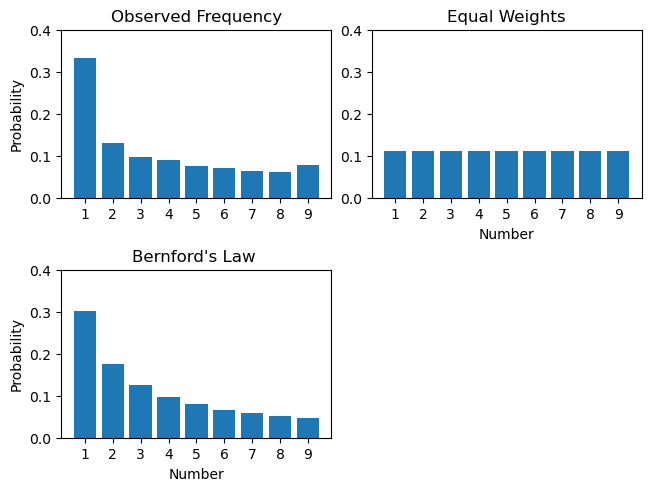

In [12]:
plt.subplots(layout='constrained')

plt.subplot(221)
plt.bar(x = range(1,10), height = freq)
plt.ylim(0,.4)
plt.xticks(range(1,10));
plt.title('Observed Frequency')
plt.ylabel('Probability')


plt.subplot(222)
plt.bar(x = range(1,10), height = equal_weights)
plt.ylim(0,.4)
plt.xticks(range(1,10));
plt.title('Equal Weights')

plt.xlabel('Number')

plt.subplot(223)
plt.bar(x = range(1,10), height = bernford)
plt.ylim(0,.4)
plt.xticks(range(1,10));
plt.title("Bernford's Law ")
plt.xlabel('Number')
plt.ylabel('Probability')

###### Q6. plot two histograms for the relative errors for Models 1 and 2 (for each digit)

Text(0, 0.5, 'Probability')

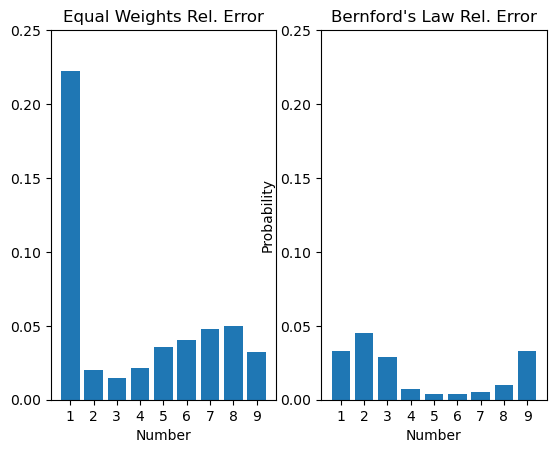

In [13]:
plt.subplot(121)
plt.bar(x = range(1,10), height = np.abs(equal_weights-freq))
plt.ylim(0,.25)
plt.xticks(range(1,10));
plt.title('Equal Weights Rel. Error')

plt.xlabel('Number')

plt.subplot(122)
plt.bar(x = range(1,10), height = np.abs(freq-bernford))
plt.ylim(0,.25)
plt.xticks(range(1,10));
plt.title("Bernford's Law Rel. Error")
plt.xlabel('Number')
plt.ylabel('Probability')

###### Q7 compute RMSE (root mean squared error) for model 1 and 2. Which model is closer to the real distribution?

In [14]:
rmse_bern = np.sqrt(np.sum((freq - bernford)**2)/9)
rmse_equ = np.sqrt(np.sum((freq - equal_weights)**2)/9)
np.round(rmse_bern,3), np.round(rmse_equ,3)

(0.024, 0.081)

Bernstein's model (RMSE of .024) is closer to the real distribution than the equal weighting model (RMSE of .081) 

###### 8. take 3 categories of your choice For each of these categories do the following: (a) compute F , P and π. (b) using RMSE as a ”distance” metric, for which of these chosen three cat- egories is the distribution ”closest” to equal weight P ?

In [15]:
nordstroms.CATEGORY.unique()

array(['Clothing', 'Shoes', 'Handbags', 'Jewelry', 'Accessories',
       'Maternity', 'New Arrivals'], dtype=object)

Chosen categories: Clothing, Jewelry, and Maternity

In [16]:
chosen_cats = ['Clothing', 'Jewelry', 'Maternity']

In [17]:
nordstroms.columns

Index(['DEPARTMENT', 'CATEGORY', 'SUBCATEGORY', 'SKU', 'PRODUCT_NAME', 'BRAND',
       'GENDER', 'PRICE_RETAIL', 'PRICE_CURRENT', 'REVIEW_RATING',
       'REVIEW_COUNT', 'PROMOTION', 'COLOR', 'RunDate', 'InsertUpdateTime',
       'LEADING_DIGIT'],
      dtype='object')

In [18]:
def freq(a):
    return np.unique(a,return_counts=True)
counts_series = nordstroms.groupby('CATEGORY')["LEADING_DIGIT"].apply(freq)[chosen_cats]

In [19]:
counts_series['Clothing']

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([23785, 14063, 14078, 12343, 11675, 11030,  8514,  6517,  6959]))

In [20]:
counts_dict = {c:dict(zip(counts_series[c][0],
                         counts_series[c][1]/np.sum(counts_series[c][1]))) 
               for c in counts_series.index }

In [21]:
counts_dict

{'Clothing': {1: 0.2182831026761132,
  2: 0.1290609742667303,
  3: 0.12919863441136523,
  4: 0.1132759443485922,
  5: 0.10714547924085019,
  6: 0.1012260930215484,
  7: 0.07813589809478359,
  8: 0.05980874417238721,
  9: 0.06386512976762967},
 'Jewelry': {1: 0.2514291250847786,
  2: 0.15457158544068728,
  3: 0.12149985466524561,
  4: 0.14840293253237735,
  5: 0.0924329037883926,
  6: 0.07118173303620451,
  7: 0.056486774537351035,
  8: 0.04779898588638052,
  9: 0.0561961050285825},
 'Maternity': {1: 0.13778950454412195,
  2: 0.03928466725300499,
  3: 0.056874816769275874,
  4: 0.20433890354734682,
  5: 0.18059220170038112,
  6: 0.10290237467018469,
  7: 0.09586631486367635,
  8: 0.08384637936089123,
  9: 0.09850483729111698}}

In [22]:
P = [1/9]*9
PI = bernford
np.round((PI,P),3)

array([[0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046],
       [0.111, 0.111, 0.111, 0.111, 0.111, 0.111, 0.111, 0.111, 0.111]])

In [23]:
def rmse(a,b):
    a= np.asarray(a)
    b = np.asarray(b)
    n = a.shape[0]
    return (sum((a-b)**2)/n)**.5

In [24]:
nordstroms['LEADING_DIGIT'] = nordstroms.PRICE_RETAIL.values.astype('U1')
def distance_rmse(category, model):
    ld = nordstroms[nordstroms['CATEGORY'] == f'{category}']['LEADING_DIGIT']
    num, count = np.unique(ld,return_counts=True)
    freq = count/sum(count)
    return rmse(freq,model)

In [25]:
equal_weights = np.ones(9)/9

In [26]:
print(f"Clothing rmse: {np.round(distance_rmse('Clothing',equal_weights),3)}\n\
Jewelry rmse: {np.round(distance_rmse('Jewelry',equal_weights),3)}\n\
Maternity rmse: {np.round(distance_rmse('Maternity',equal_weights),3)}")

Clothing rmse: 0.045
Jewelry rmse: 0.062
Maternity rmse: 0.051


From above we can see that clothing has an rmse that is closest to equal weighting.

###### Q9. discuss your findings

From the above, clothing has closest to random first digits. 